# EXPLORATORY DATA ANALYSIS

**WHY TESLA**:

1. **Market Performance**: Despite challenges such as supply chain disruptions and global chip shortages, Tesla continues to dominate the electric vehicle market, maintaining a significant share of total EV sales globally.

2. **Financial Resilience**: Tesla's financial performance remains robust, with steady revenue growth and strong profitability in the face of market fluctuations and economic uncertainties.

3. **Innovation and Product Development**: Tesla continues to innovate in areas such as battery technology, autonomous driving software, and energy storage solutions, solidifying its position as a leader in the sustainable energy sector.

4. **Stock Market Performance**: Tesla's stock price has displayed resilience and upward momentum, reflecting investor confidence in the company's long-term growth prospects and its ability to navigate challenges effectively.

5. **Expansion and Market Penetration**: Tesla is expanding its presence in key markets globally, with new manufacturing facilities, service centers, and Supercharger networks, further strengthening its position in the electric vehicle market.

6. **Regulatory Environment**: Tesla is navigating various regulatory challenges and policy changes in different regions, adapting its strategies to comply with evolving regulations while maintaining its commitment to sustainability and innovation.

7. **Competitive Landscape**: Tesla faces increasing competition from traditional automakers and new entrants in the electric vehicle market. However, its strong brand, technology leadership, and loyal customer base continue to set it apart from competitors.

As of June 2024, Tesla (TSLA) has a market capitalization of $567.93 billion, making it the world's 14th most valuable company by market capitalization. Market capitalization, often referred to as market cap, represents the total market value of a publicly traded company's outstanding shares and is a widely used metric to assess a company's value in the financial markets.

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# Load each CSV file into a DataFrame
df1 = pd.read_csv("NIO_stock.csv")
df2 = pd.read_csv("NVDA_stock.csv")
df3 = pd.read_csv("PCRFY_stock.csv")
df4 = pd.read_csv("TSLA_stock.csv")

# Concatenate DataFrames
df = pd.concat([df1, df2,df4])

# Optionally, you can reset the index of the merged DataFrame
df.reset_index(drop=True, inplace=True)

# Save the merged DataFrame to a new CSV file
df.to_csv("merged_data.csv", index=False)


In [30]:
# Save the merged DataFrame to a new CSV file
df.to_csv("merged_data.csv", index=False)

In [28]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209 entries, 0 to 8208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          8209 non-null   datetime64[ns, UTC]
 1   Company_ID    8209 non-null   object             
 2   Open          8209 non-null   float64            
 3   High          8209 non-null   float64            
 4   Low           8209 non-null   float64            
 5   Close         8209 non-null   float64            
 6   Volume        8209 non-null   int64              
 7   Dividends     8209 non-null   float64            
 8   Stock Splits  8209 non-null   float64            
 9   Adj Close     8209 non-null   float64            
 10  MA10          8209 non-null   float64            
 11  MA50          8209 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(1), object(1)
memory usage: 769.7+ KB


In [16]:
# Calculates the 10-period moving average of the 'Close' price.
# It computes the mean of the last 10 closing prices for each row.
df['MA10'] = df['Close'].rolling(10).mean()

# Calculates the 50-period moving average of the 'Close' price.
# It computes the mean of the last 50 closing prices for each row.
df['MA50'] = df['Close'].rolling(50).mean()
# Changing NaN with 0
df = df.fillna(0)




1. **Date**: This column represents the date on which the stock data was recorded. It serves as a temporal indicator for tracking changes in stock prices and other financial metrics over time.

2. **Company_ID**: This column identifies the individual companies whose stock data is included in the DataFrame. Each row corresponds to a specific company, enabling analysis and comparison of multiple companies within the dataset.

3. **Open**: The "Open" price refers to the price at which a stock's trading session commenced for a given trading day. It reflects the initial market sentiment and investor activity at the beginning of the trading session.

4. **High**: The "High" price denotes the highest price at which a stock traded during the trading day. It indicates the peak price level reached by the stock within the trading session.

5. **Low**: The "Low" price represents the lowest price at which a stock traded during the trading day. It signifies the lowest price level touched by the stock within the trading session.

6. **Close**: The "Close" price signifies the final price at which a stock traded at the end of the trading day. It reflects the last price level at which transactions occurred before the market closed.

7. **Volume**: The "Volume" column quantifies the total number of shares traded for a particular stock during the trading day. It provides insights into the level of investor interest and market activity for the stock.

8. **Dividends**: This column captures any dividend payments distributed by the company to its shareholders on the respective trading day. Dividends represent a portion of the company's profits allocated to shareholders as a form of distribution.

9. **Stock Splits**: The "Stock Splits" column records any instances of stock splits that occurred on the trading day. A stock split involves dividing existing shares of stock into multiple shares, effectively increasing the number of outstanding shares while reducing the share price proportionally.

10. **Adj Close**: The "Adj Close" price adjusts the closing price of the stock to account for corporate actions such as dividends, stock splits, and other factors that may impact the stock's value. It provides a more accurate representation of the stock's true value, accounting for these adjustments.

11. **MA10**: The "MA10" column calculates the 10-day moving average of the stock's closing prices. Moving averages smooth out short-term fluctuations in stock prices, providing insights into the underlying trend or direction of the stock's price movements over the specified period.

12. **MA50**: Similarly, the "MA50" column calculates the 50-day moving average of the stock's closing prices. It offers a longer-term perspective on the stock's price trends by averaging the closing prices over a 50-day period.

In economic terms, this DataFrame encapsulates key financial indicators and metrics relevant to stock market analysis, facilitating the assessment of stock price movements, trading activity, and other factors influencing investor behavior and market dynamics.

In [32]:
df.tail

<bound method NDFrame.tail of                           Date Company_ID        Open        High         Low  \
0    2018-09-12 04:00:00+00:00        NIO    6.000000    6.930000    5.350000   
1    2018-09-13 04:00:00+00:00        NIO    6.620000   12.690000    6.520000   
2    2018-09-14 04:00:00+00:00        NIO   12.660000   13.800000    9.220000   
3    2018-09-17 04:00:00+00:00        NIO    9.610000    9.750000    8.500000   
4    2018-09-18 04:00:00+00:00        NIO    8.730000    9.100000    7.670000   
...                        ...        ...         ...         ...         ...   
8204 2023-03-31 04:00:00+00:00       TSLA  197.529999  207.789993  197.199997   
8205 2023-04-03 04:00:00+00:00       TSLA  199.910004  202.690002  192.199997   
8206 2023-04-04 04:00:00+00:00       TSLA  197.320007  198.740005  190.320007   
8207 2023-04-05 04:00:00+00:00       TSLA  190.520004  190.679993  183.759995   
8208 2023-04-06 04:00:00+00:00       TSLA  183.080002  186.389999  179.740005  

In [17]:
# Get a list of unique companies
companies = df['Company_ID'].unique()

# Loop through each company and create a plot
for company in companies:
    # Filter the DataFrame for the current company
    company_df = df[df['Company_ID'] == company].set_index('Date')

    # Create traces
    trace_adj_close = go.Scatter(
        x=company_df.index,
        y=company_df['Adj Close'],
        mode='lines',
        name='Adjusted Close Price'
    )

    trace_ma10 = go.Scatter(
        x=company_df.index,
        y=company_df['MA10'],
        mode='lines',
        name='10-Day Moving Average'
    )

    trace_ma50 = go.Scatter(
        x=company_df.index,
        y=company_df['MA50'],
        mode='lines',
        name='50-Day Moving Average'
    )

    # Create the layout
    layout = go.Layout(
        title=f'Stock Price and Moving Averages for Company {company}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )

    # Create the figure
    fig = go.Figure(data=[trace_adj_close, trace_ma10, trace_ma50], layout=layout)

    # Show the plot
    fig.show()

**NIO**

**Chart Analysis:**

This chart shows the stock price of NIO (NIO) and its 10-day and 50-day moving averages. The moving averages are indicators used by technical analysts to determine the trend of a stock price. The 10-day moving average is a short-term indicator, while the 50-day moving average is a longer-term indicator.

**Economic Interpretation:**

* **Trend Identification:** The chart shows that NIO's stock price has been on an upward trend in recent years. The stock price has been consistently above both the 10-day and 50-day moving averages, which suggests that the stock is in a bullish trend.
* **Support and Resistance:** The 10-day and 50-day moving averages have acted as support levels for the stock price, with the price bouncing off these levels during pullbacks.
* **Crossovers:** In 2022, the 10-day moving average crossed above the 50-day moving average, which is a bullish signal. This crossover suggests that the stock price is likely to continue its upward trend in the near future.

**Economic Factors:**

* **Electric Vehicle (EV) Industry Growth:** NIO is a leading Chinese electric vehicle manufacturer. The EV industry is expected to continue to grow in the coming years, driven by government policies and increasing consumer demand for sustainable transportation. This growth could boost demand for NIO's products and drive its stock price higher.
* **Competition:** The EV industry is highly competitive, with established players like Tesla and new entrants like XPeng and Li Auto. NIO's ability to differentiate itself through its products and services will be crucial to its success.
* **Chinese Economy:** As a Chinese company, NIO's stock price is closely tied to the performance of the Chinese economy. Any slowdown in the Chinese economy could negatively impact NIO's stock price.

**Investment Implications:**

* **Bullish Sentiment:** The chart suggests a bullish sentiment for NIO's stock price, with the price consistently above both moving averages.
* **Buy Signal:** The crossover of the 10-day moving average above the 50-day moving average could be seen as a buy signal for investors.
* **Risk Management:** However, investors should be aware of the risks associated with investing in the EV industry, including competition, regulatory changes, and economic uncertainty. It's essential to conduct thorough research and set stop-loss levels to manage risk.

Please keep in mind that this is a technical analysis and should not be considered as investment advice. It's essential to do your own research and consider multiple factors before making any investment decisions.

**NVDA**

This chart shows the stock price of NVIDIA (NVDA) and its 10-day and 50-day moving averages. The moving averages are indicators used by technical analysts to determine the trend of a stock price. The 10-day moving average is a short-term indicator, while the 50-day moving average is a longer-term indicator.

The chart shows that NVIDIA's stock price has been on an upward trend in recent years. The stock price has been consistently above both the 10-day and 50-day moving averages, which suggests that the stock is in a bullish trend.

In 2022, the stock price experienced a pullback, but it has since recovered. The 10-day moving average crossed above the 50-day moving average in early 2023, which is a bullish signal. This suggests that the stock price is likely to continue its upward trend in the near future.

Overall, this chart suggests that NVIDIA is a strong company with a bright future. The stock price has been on an upward trend for several years, and there is no reason to believe that this trend will not continue. However, it is important to note that the stock market is unpredictable, and there is always the risk of a downturn. Investors should carefully consider their own risk tolerance before investing in NVIDIA or any other stock.

Here are some economic factors that could impact the stock price of NVIDIA:

* **The growth of the gaming industry:** NVIDIA is a leading provider of graphics processing units (GPUs) for gaming PCs and consoles. The gaming industry is expected to continue to grow in the coming years, which could boost demand for NVIDIA's products.
* **The growth of artificial intelligence (AI):** NVIDIA's GPUs are also used for AI applications, such as machine learning and deep learning. The AI industry is growing rapidly, and NVIDIA is well-positioned to benefit from this growth.
* **The development of new technologies:** NVIDIA is constantly developing new technologies, such as its GeForce RTX series of GPUs and its Drive platform for autonomous vehicles. These new technologies could drive further growth in the company's revenue.

It is important to keep in mind that these are just some of the factors that could affect the stock price of NVIDIA. The stock market is complex, and there are many other factors that could influence the price of a stock. Investors should conduct their own research before making any investment decisions.

**TSLA**
**Chart Analysis:**

This chart shows the stock price of Tesla (TSLA) and its 10-day and 50-day moving averages. The moving averages are indicators used by technical analysts to determine the trend of a stock price. The 10-day moving average is a short-term indicator, while the 50-day moving average is a longer-term indicator.

**Economic Interpretation:**

* **Trend Identification:** The chart shows that Tesla's stock price has been on a volatile ride in recent years. The stock price has experienced significant fluctuations, but overall, it has been trending upward.
* **Support and Resistance:** The 10-day and 50-day moving averages have acted as support levels for the stock price, with the price bouncing off these levels during pullbacks. The 50-day moving average has also acted as a resistance level, with the price struggling to break above it during certain periods.
* **Crossovers:** In 2020, the 10-day moving average crossed above the 50-day moving average, which is a bullish signal. This crossover suggested that the stock price was likely to continue its upward trend in the near future.

**Economic Factors:**

* **Electric Vehicle (EV) Industry Growth:** Tesla is a leading player in the electric vehicle industry, which is expected to continue to grow in the coming years. Government policies and increasing consumer demand for sustainable transportation are driving this growth.
* **Autonomous Driving Technology:** Tesla is also a leader in autonomous driving technology, which is expected to be a key driver of growth in the future.
* **Competition:** The EV industry is highly competitive, with established players like General Motors and new entrants like Rivian and Lucid Motors. Tesla's ability to differentiate itself through its products and services will be crucial to its success.
* **Elon Musk's Leadership:** Elon Musk's leadership and vision for the company have been key drivers of Tesla's success. However, his tweets and public statements have also led to volatility in the stock price.

**Investment Implications:**

* **Bullish Sentiment:** The chart suggests a bullish sentiment for Tesla's stock price, with the price consistently above both moving averages.
* **Buy Signal:** The crossover of the 10-day moving average above the 50-day moving average could be seen as a buy signal for investors.
* **Risk Management:** However, investors should be aware of the risks associated with investing in Tesla, including competition, regulatory changes, and Elon Musk's leadership style. It's essential to conduct thorough research and set stop-loss levels to manage risk.

**Additional Insights:**

* **Valuation:** Tesla's stock price has been driven by its growth potential and the expectation of increasing profitability. However, some investors have raised concerns about the company's valuation, which is higher than its peers.
* **Short Selling:** Tesla has been a popular target for short sellers, who bet against the company's stock price. This has led to significant volatility in the stock price.

Please keep in mind that this is a technical analysis and should not be considered as investment advice. It's essential to do your own research and consider multiple factors before making any investment decisions.

In [58]:
df.head

<bound method NDFrame.head of             Date Company_ID        Open        High         Low       Close  \
0     2018-09-12        NIO    6.000000    6.930000    5.350000    6.600000   
1     2018-09-13        NIO    6.620000   12.690000    6.520000   11.600000   
2     2018-09-14        NIO   12.660000   13.800000    9.220000    9.900000   
3     2018-09-17        NIO    9.610000    9.750000    8.500000    8.500000   
4     2018-09-18        NIO    8.730000    9.100000    7.670000    7.680000   
...          ...        ...         ...         ...         ...         ...   
12047 2023-03-31       TSLA  197.529999  207.789993  197.199997  207.460007   
12048 2023-04-03       TSLA  199.910004  202.690002  192.199997  194.770004   
12049 2023-04-04       TSLA  197.320007  198.740005  190.320007  192.580002   
12050 2023-04-05       TSLA  190.520004  190.679993  183.759995  185.520004   
12051 2023-04-06       TSLA  183.080002  186.389999  179.740005  185.059998   

          Volume  Div

In [18]:
# Get unique company IDs
company_ids = df['Company_ID'].unique()

# Create a figure
fig = go.Figure()

# Add a line plot for each company
for company_id in company_ids:
    # Filter the DataFrame for the current company
    company_df = df[df['Company_ID'] == company_id]
    
    # Add a trace for the Close prices of the current company
    fig.add_trace(go.Scatter(x=company_df['Date'], y=company_df['Close'], mode='lines', name=f'Company {company_id}'))

# Customize the layout
fig.update_layout(title='Comparison of Close Prices Over Time for Different Companies',
                  xaxis_title='Date',
                  yaxis_title='Close Price')

# Show the plot
fig.show()


From an economic perspective, this chart suggests the following:

1. **Growth in Technology Sector**: The chart shows a general upward trend in the stock prices of all four companies, indicating a growth in the technology sector as a whole. This could be attributed to increasing demand for technology products and services, advancements in technology, and growing investor confidence in the sector.

2. **Market Leadership**: The chart suggests that TSLA (Tesla) and NIO have been market leaders in terms of stock price growth, indicating that investors have been bullish on electric vehicle (EV) manufacturers. This could be due to growing demand for EVs, government incentives, and increasing competition in the industry.

3. **NVIDIA's Dominance**: NVDA (NVIDIA) has also seen significant growth, indicating its dominance in the graphics processing unit (GPU) market and its expansion into new areas such as artificial intelligence (AI) and autonomous vehicles.

4. **Industry Trends**: The chart suggests that the technology sector, particularly electric vehicles and graphics processing, has been a key driver of growth in recent years. This could be attributed to changing consumer preferences, advancements in technology, and government policies supporting sustainable energy.

5. **Investment Opportunities**: The chart presents investment opportunities in the technology sector, particularly in companies that are leaders in their respective fields. However, it also highlights the importance of diversification and careful analysis of individual company performance before making investment decisions.

6. **Risk and Volatility**: The chart also shows periods of volatility and decline in stock prices, indicating that the technology sector is not immune to market risks and fluctuations. Investors should be cautious and prepared for potential downturns in the market.

Overall, the chart suggests that the technology sector has been a key driver of growth in recent years, with certain companies and industries leading the way. However, it also highlights the importance of careful analysis and diversification to manage risk and maximize returns.

In [19]:
# Create a list to hold traces for each company
traces = []

# Get unique company IDs
company_ids = df['Company_ID'].unique()

# Add a trace for each company
for company_id in company_ids:
    # Filter the DataFrame for the current company
    company_df = df[df['Company_ID'] == company_id]
    
    # Add a scatter or bar trace for the Volume of the current company
    traces.append(go.Scatter(x=company_df['Date'], y=company_df['Volume'], mode='lines', name=f'Volume - Company {company_id}'))

# Create the figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(title='Volume Comparison for Different Companies', xaxis_title='Date', yaxis_title='Volume')

# Show the plot
fig.show()


This graph shows the trading volume of three companies: NIO, NVDA, and TSLA, over a period of about 12 years.  

* **Trading volume** is a measure of how many shares of a company's stock are traded on a given day. High volume indicates more investor interest in the stock. 

Here's what we can observe economically from this graph: 

* **TSLA (Tesla)** has the highest trading volume overall. This suggests that Tesla has consistently been a popular stock among investors, and its price movements likely have a significant impact on the broader market. 
* **NVDA (Nvidia)** has a high trading volume in certain periods, like 2017-2019 and 2021-2022. This could be linked to periods of strong performance or significant news events for the company. 
* **NIO (NIO Inc.)** has a lower trading volume overall, with a spike in 2020 and 2022. This suggests less investor interest in NIO, possibly due to its later entry in the electric vehicle market compared to Tesla. 

It's important to note that trading volume is only one factor to consider when evaluating a company's performance.  Other factors like company financials, industry trends, and macroeconomic conditions also play a significant role.  


In [25]:
# List of specified company IDs
selected_companies = ['NIO', 'NVDA', 'TSLA']

# Loop through each unique company ID
for company_id in selected_companies:
    # Filter data for the current company ID
    df_company = df[df['Company_ID'] == company_id]

    # Create traces for MA10, MA50, Open, and Close
    trace_ma10 = go.Scatter(x=df_company['Date'], y=df_company['MA10'], mode='lines', name='MA10', line=dict(color='blue'))
    trace_ma50 = go.Scatter(x=df_company['Date'], y=df_company['MA50'], mode='lines', name='MA50', line=dict(color='red'))
    trace_open = go.Scatter(x=df_company['Date'], y=df_company['Open'], mode='lines', name='Open', line=dict(color='green'))
    trace_close = go.Scatter(x=df_company['Date'], y=df_company['Close'], mode='lines', name='Close', line=dict(color='orange'))

    # Create layout
    layout = go.Layout(
        title=f'Comparison of MA10, MA50, Open, and Close Prices Over Time for {company_id}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )

    # Combine traces into a list
    all_traces = [trace_ma10, trace_ma50, trace_open, trace_close]

    # Create figure
    fig = go.Figure(data=all_traces, layout=layout)

    # Show plot
    fig.show()


This chart shows the price movements of the stock of NIO, a Chinese electric vehicle manufacturer, over time. The chart includes the stock's closing price, opening price, and two moving averages, MA10 and MA50. A moving average is a technical indicator that smooths out price fluctuations over a set period of time, in this case, 10 days and 50 days. 

Here's how to interpret the chart:

* **Price Fluctuations:** The chart shows the stock price fluctuating over time, revealing periods of growth, decline, and volatility. 
* **Moving Averages:** The MA10 (blue line) reacts more quickly to price changes than the MA50 (red line) because it is based on a shorter period. This makes the MA10 a more sensitive indicator of short-term price trends. 
* **Support and Resistance:**  When the price crosses the MA10 or MA50, it can be interpreted as a potential buy or sell signal. For example, if the stock price crosses above the MA50, it can be considered a bullish signal, suggesting a potential upward trend. 
* **Trend Analysis:**  By observing how the price moves in relation to the moving averages, traders can identify potential trends.  A price above both the MA10 and MA50 may indicate an upward trend, while a price below both could suggest a downward trend. 
* **Trading Strategies:** The information from this chart can be used to develop trading strategies, such as buying when the price breaks above a moving average or selling when it falls below it.

**Economic Factors:**

The price fluctuations in the chart can be influenced by various economic factors impacting NIO and the EV industry, such as:

* **Market Demand for Electric Vehicles:** As demand for EVs increases, NIO's stock price may benefit.
* **Competition:** Competition from other EV manufacturers can impact NIO's market share and profitability.
* **Government Policies:** Government incentives and regulations related to EVs can influence the industry's growth.
* **Global Economic Conditions:** Economic factors like interest rates, inflation, and recessionary pressures can affect investor sentiment and NIO's stock performance.

It's important to remember that this chart provides only a visual representation of price movements, and it doesn't guarantee future stock performance. Investing in the stock market carries inherent risks, and thorough research and analysis are crucial before making any investment decisions. 


This chart depicts the historical performance of NVIDIA (NVDA) stock, a leading manufacturer of graphics processing units (GPUs) used in gaming, data centers, and artificial intelligence.  

The chart showcases several key data points:

* **Moving Averages (MA10 and MA50):** The blue line (MA10) represents the 10-day moving average, while the red line (MA50) represents the 50-day moving average. Moving averages smooth out price fluctuations and provide a sense of the overall trend. When the MA10 crosses above the MA50, it can be seen as a bullish signal, suggesting upward momentum. Conversely, a crossover below indicates potential bearish sentiment.
* **Open and Close Prices:** The green line reflects the daily opening price of NVDA stock, while the orange line represents the closing price. The difference between these prices can indicate market sentiment and trading activity.

**Economic Implications:**

* **Growth and Innovation:** The chart reflects NVIDIA's strong growth trajectory over the past decade. This is likely due to factors such as the rise of gaming, the increasing demand for GPUs in data centers, and the expansion of artificial intelligence applications.
* **Market Cycles:** The chart highlights periods of volatility and market corrections (downswings). This is common in the stock market, and investors often consider these dips as potential buying opportunities.
* **Technological Advancements:** NVIDIA's success is heavily tied to its ability to innovate and develop cutting-edge technologies. The chart may indicate periods of increased investment in research and development, leading to advancements in GPU performance and functionality.
* **Economic Sentiment:** The stock's performance can be influenced by broader economic factors. For instance, periods of economic uncertainty or recession could lead to a decline in NVDA stock, as businesses and consumers reduce spending on discretionary items.

**Overall, the chart highlights NVIDIA's growth and the factors that have contributed to its success. It also provides insights into the cyclical nature of the stock market and the importance of considering both technological and economic factors when investing.** 


Here is an explanation of the chart from an economic perspective, similar to the previous responses:

**Chart Analysis:**

This chart depicts the historical performance of Tesla, Inc. (TSLA), a pioneering electric vehicle (EV) and clean energy company. The chart showcases several key data points:

* **Moving Averages (MA10 and MA50):** The blue line (MA10) represents the 10-day moving average, while the red line (MA50) represents the 50-day moving average. Moving averages smooth out price fluctuations and provide a sense of the overall trend. When the MA10 crosses above the MA50, it can be seen as a bullish signal, suggesting upward momentum. Conversely, a crossover below indicates potential bearish sentiment.
* **Open and Close Prices:** The green line reflects the daily opening price of TSLA stock, while the orange line represents the closing price. The difference between these prices can indicate market sentiment and trading activity.

**Economic Implications:**

* **Disruptive Innovation:** The chart reflects Tesla's groundbreaking impact on the automotive and energy industries. The company's innovative products and services, such as Autopilot, Supercharger networks, and solar energy solutions, have disrupted traditional business models and driven growth.
* **Growth and Expansion:** Tesla's stock performance is closely tied to its ability to expand production, increase sales, and enter new markets. The chart may indicate periods of rapid growth, such as the introduction of new models like the Model 3 or the acquisition of SolarCity.
* **Regulatory Environment:** Government policies and regulations play a crucial role in shaping the EV market. The chart may reflect the impact of incentives, tax credits, or emissions standards on Tesla's stock performance.
* **Competition and Market Share:** As the EV market grows, Tesla faces increasing competition from established automakers and new entrants. The chart may indicate periods of intense competition, which can affect Tesla's market share and stock price.
* **Economic Cycles:** The chart highlights periods of economic uncertainty, such as recessions or trade tensions, which can impact consumer spending and Tesla's stock performance.

**Overall, the chart highlights Tesla's innovative spirit, growth trajectory, and the factors that have contributed to its success. It also provides insights into the competitive landscape, regulatory environment, and economic cycles that influence the company's stock performance.**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12052 entries, 0 to 12051
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          12052 non-null  datetime64[ns, UTC]
 1   Company_ID    12052 non-null  object             
 2   Open          12052 non-null  float64            
 3   High          12052 non-null  float64            
 4   Low           12052 non-null  float64            
 5   Close         12052 non-null  float64            
 6   Volume        12052 non-null  int64              
 7   Dividends     12052 non-null  float64            
 8   Stock Splits  12052 non-null  float64            
 9   Adj Close     12052 non-null  float64            
 10  MA10          12052 non-null  float64            
 11  MA50          12052 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(1), object(1)
memory usage: 1.1+ MB


In [43]:
df.duplicated().sum()

0

In [47]:
df['Dividends'].info

<bound method Series.info of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12047    0.0
12048    0.0
12049    0.0
12050    0.0
12051    0.0
Name: Dividends, Length: 12052, dtype: float64>

In [21]:
tweets_1 = pd.read_csv('tweets_cleaned_new.csv')

In [80]:
tweets_1

Date                                              Tweet  \
0      2023-04-10  Tesla to open a new Megafactory in Shanghai, C...   
1      2023-04-10  #5things: China holds military drills around T...   
2      2023-04-09  WATCH: Tesla Chief Executive Elon Musk is maki...   
3      2023-04-09  Tesla’s Model S and X are starting to show the...   
4      2023-04-09  How the market’s biggest companies, from Apple...   
...           ...                                                ...   
22340  2010-02-17  Plane owned by Tesla engineer crashes, 3 dead ...   
22341  2010-02-17  Plane owned by Tesla engineer crashes, 3 dead ...   
22342  2010-01-14  Move over, Thomas Edison. Nikola Tesla, pionee...   
22343  2009-09-15  Bloomberg News: Electric Sports-Car Maker Tesl...   
22344  2008-07-08  Tesla Taps Chrysler Executive http://tinyurl.c...   

                                         tweet_processed Sentiment  
0      tesla open new megafactory shanghai china comp...   Neutral  
1      china hold military drill around taiwan ftx co...  Negative  
2      watch tesla chief executive elon musk making p...   Neutral  
3                        tesla model x starting show age   Neutral  
4      market biggest company apple tesla microsoft i...   Neutral  
...                                                  ...       ...  
22340            plane owned tesla engineer crash 3 dead  Negative  
22341            plane owned tesla engineer crash 3 dead  Negative  
22342  move thomas edison nikola tesla pioneer altern...  Positive  
22343  bloomberg news electric sportscar maker tesla ...   Neutral  
22344                       tesla tap chrysler executive   Neutral  

[22345 rows x 4 columns]

In [81]:
tweets_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22345 entries, 0 to 22344
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             22345 non-null  object
 1   Tweet            22345 non-null  object
 2   tweet_processed  22345 non-null  object
 3   Sentiment        22345 non-null  object
dtypes: object(4)
memory usage: 698.4+ KB


In [23]:
# Get unique values of sentiment and their counts
sentiment_counts = tweets_1['Sentiment'].value_counts()

# Define colors for each sentiment
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Adjust colors as needed

# Create a bar graph with Plotly
fig = go.Figure(go.Bar(x=sentiment_counts.index, y=sentiment_counts.values, marker=dict(color=colors[:len(sentiment_counts)])))

# Customize layout
fig.update_layout(
    title='Sentiment Counts',
    xaxis_title='Sentiment',
    yaxis_title='Count',
    # template='plotly_dark'  # Choose a template (optional)
)

# Show the plot
fig.show()


This chart shows the sentiment of Twitter posts about Tesla. The majority of posts are neutral (blue), followed by positive (green) and then negative (red).

This information can be useful for stock analysis in the following ways:

* **Identify trends:** If there is a significant shift in sentiment, it could indicate a change in public opinion about Tesla and its stock. For example, if there is a sudden increase in negative sentiment, it might signal that investors are becoming concerned about the company.
* **Predict future price movements:**  While not a guaranteed indicator, sentiment analysis can help understand the overall market mood and potentially predict future price movements. 
* **Understand market drivers:** By analyzing the reasons behind the different sentiments, you can gain insights into the factors driving market sentiment and price changes. For example, a surge in negative sentiment might be linked to specific news events, product launches, or regulatory changes.

**Important Note:** 

* **Sentiment analysis is not a crystal ball:** It is only one tool among many that should be used to inform investment decisions.
* **Context is crucial:**  The context of the tweets is essential for understanding the sentiment. For instance, a tweet expressing dissatisfaction with a specific Tesla feature doesn't necessarily indicate a negative sentiment about the company as a whole. 
* **Combine with other data:** Sentiment analysis should be combined with other financial data, such as earnings reports, analyst ratings, and industry news to form a well-rounded picture.

By incorporating sentiment analysis as part of a comprehensive investment strategy, you can gain valuable insights into the market dynamics surrounding Tesla and make more informed investment decisions. 


In [91]:
tweets_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22345 entries, 0 to 22344
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             22345 non-null  object
 1   Tweet            22345 non-null  object
 2   tweet_processed  22345 non-null  object
 3   Sentiment        22345 non-null  object
dtypes: object(4)
memory usage: 698.4+ KB


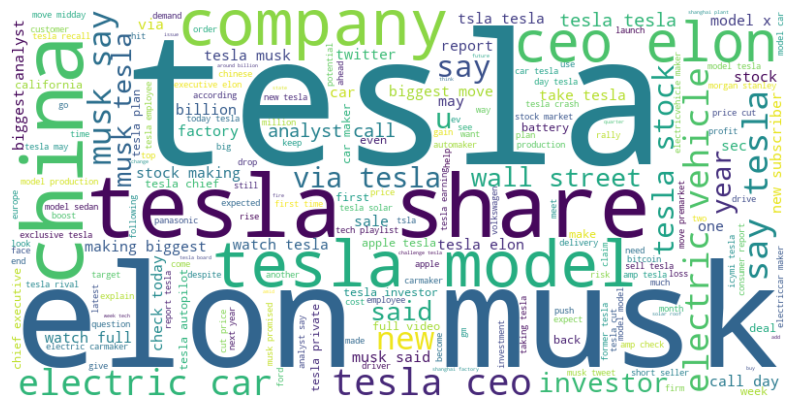

In [94]:
# Concatenate all the tweets into a single string
all_tweets = ' '.join(tweets_1['tweet_processed'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
